# 1.单变量线性回归

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv('./ex1data1.txt',names=['poplution','profit'])
data.head()

,poplution,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [11]:
data.describe()

,poplution,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
poplution    97 non-null float64
profit       97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


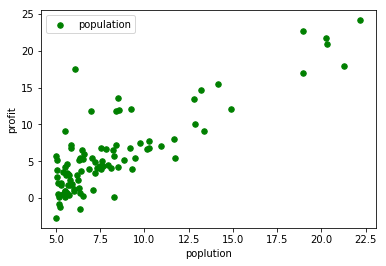

In [15]:
data.plot.scatter('poplution','profit',c='g',label = 'population',s=30)

In [16]:
data.insert(0,'ones',1)
data.head()

,ones,poplution,profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [19]:
X = data.iloc[:,0:-1]
X.head()

,ones,poplution
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [20]:
y = data.iloc[:,-1]
y.head()

0    17.5920
1     9.1302
2    13.6620
3    11.8540
4     6.8233
Name: profit, dtype: float64

In [21]:
X = X.values

In [22]:
X.shape

(97, 2)

In [25]:
y = y.values

In [26]:
y.shape

(97,)

In [27]:
y =y.reshape(97,1)

In [28]:
y.shape

(97, 1)

In [29]:
def costFunction(X,y,theta):
    inner = np.power(X @ theta- y,2)
    return  np.sum(inner)/(2*len(X))

In [30]:
theta = np.zeros((2,1))
theta.shape

(2, 1)

In [31]:
cost_init = costFunction(X,y,theta)

In [32]:
cost_init

32.072733877455676

In [33]:
def gradientDecent(X,y,theta,alpha,iters):
    coses = []
    for i in range(iters):
        theta = theta - X.T @ (X @ theta - y)*alpha / len(X)
        cost = costFunction(X,y,theta)
        coses.append(cost)
        
        if i % 100 == 0:
            print(cost)
    return theta,coses

In [34]:
alpha = 0.01
iters = 2000
theta ,coses = gradientDecent(X,y,theta,alpha,iters)

6.737190464870009
5.476362817272741
5.173634551165022
4.962606493117519
4.815501494116686
4.712956453749759
4.6414735988143185
4.591643801766725
4.5569080784097515
4.532694243543437
4.515815084502823
4.504048835517841
4.495846731678219
4.490129148489064
4.486143493324961
4.483365143354071
4.4814283906138295
4.480078304693718
4.479137176818275
4.47848112844036


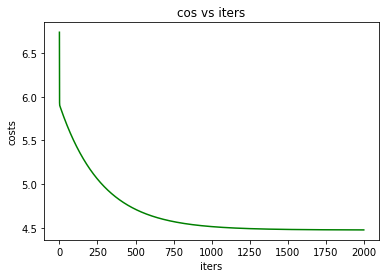

In [39]:
fig,ax = plt.subplots()
ax.plot(np.arange(iters),coses,'g')
ax.set(xlabel = 'iters',
       ylabel = 'costs',
       title = 'cos vs iters')
plt.show()

In [43]:
theta

array([[-3.78806857],
       [ 1.18221277]])

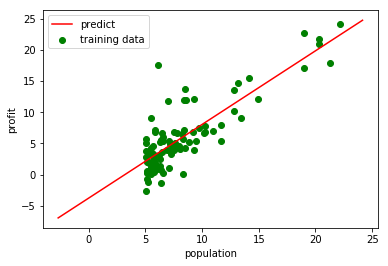

In [46]:
x = np.linspace(y.min(),y.max(),100)
y_ = theta[0,0] + theta[1,0] * x
fig,ax = plt.subplots()
ax.scatter(X[:,1],y,c = 'g',label = 'training data')
ax.plot(x,y_,'r',label = 'predict')
ax.legend()
ax.set(
    xlabel = 'population',
    ylabel = 'profit'
)
plt.show()